# 1.函数 

当我们需要重复使用一些功能，了你的数学中计算前数列加和，计算圆面积等，当有一套固定的处理流程，只是输入不同得到不同输出时，我们不需要要每次重新写计算流程，而是将计算流程写成一个函数，当需要计算式，只需要往函数中传参，函数的基本形式如下：

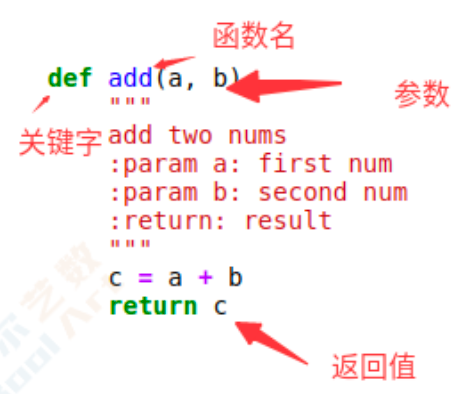

In [ ]:
def num_cal(a,b):
    c = a+b
    d = a*b
    return c,d
c,d = num_cal(10,15)
print('加法:',c,'减法:',d)
c,d = num_cal(2,5)
print('加法:',c,'减法:',d)

In [ ]:
def num_quad(x):
    y = 2*x**2 + 4*x + 6
    return y
print(num_quad(2))

In [25]:
#函数可以让我们的代码更加模块化，当我们要实现一个列表的排序时
def list_sort(arr):
    n = len(arr)
    for i in range(n):
#         print('i:',i)
        for j in range(0,n-i-1):
#             print('j:',j)
            if arr[j]>arr[j+1]:
#                 print(arr[j],'>',arr[j+1])
                arr[j],arr[j+1] = arr[j+1],arr[j]
#                 print(arr[j],arr[j+1])
                
arr=[64,34,25,12,22,11,90]
list_sort(arr)
arr1=[6,4,5,12,9,11,7]
list_sort(arr1)
print('arr1',arr1)


arr1 [4, 5, 6, 7, 9, 11, 12]


## 1.1传参 

函数通常需要接受传递过来的参数，参数的常用形式如下

In [27]:
#位置参数，通过参数位置将对应的值赋给对应的变量
def func(x , n):
    print('x',x,'n',n)
func(2,3)
func(3,2)

x 2 n 3
x 3 n 2


In [28]:
func(2,3,4) #当参数数量和函数数量不匹配时会报错

TypeError: func() takes 2 positional arguments but 3 were given

In [30]:
# 默认参数，当函数含有默认值时，调用时不传则使用默认值
def func1(x, n=2):
    print('x',x,'n',n)
func1(2)
func(2,3)

x 2 n 2
x 2 n 3


可变参数，就是当我们定义函数的时候还不不知道具体需要传入多少个参数，或者参数太长了不方便写

可变参数就是传入的参数个数是可变的，可以使1个、2个到任意个，还可以是0个。

In [35]:
#可变参数以元祖的形式存在 *args
def fun(a,b=2,*args):
    print(a)
    print(b)
    print('-'*50)
    print(type(args),args)
    print(args[0])

fun(1,2,7,3,4,5)#可变参数前的默认参数，不能跳过传参

1
2
--------------------------------------------------
<class 'tuple'> (7, 3, 4, 5)
7


In [43]:
#关键字参数允许你传入0个或任意个含参数名的参数，这些关键字参数在函数内部自动组装为一个dict. **kwargs
#参数顺序：位置参数，默认参数，可变参数，关键字参数！！！！
def fun(a,b=2,*args,**kwargs):
    print(a)
    print(b)
    print('-'*40)
    print(type(args),args)
    print(type(kwargs),kwargs)
    print(kwargs['c'])

fun(1,2,3,4,c=5,d=6,f=7)


1
2
----------------------------------------
<class 'tuple'> (3, 4)
<class 'dict'> {'c': 5, 'd': 6, 'f': 7}
5


# 2.局部变量和全局变量 

不同的函数，可以定义相同的名字的局部变量，但是各用各的不会产生影响局部变量的作用，为了临时保存数据需要在函数中定义变量来进行存储

变量在函数体外部定义，能在其他函数中使用，这样的变量就是全局变量，函数内使用全局变量不添加global定义时不能修改全局变量的值

In [ ]:
# 定义全局变量
a = 100
def test0():
    #a=a+100 不能修改a,否则报错：local variable 'a' referenced before assignment
    print('直接使用全局变量',a)
    
    
def test1():
    a=200
    print('局部变量定义全局变量相同变量名',a)
    
def test2():
    global a 
    a = 500
    print('函数内修改全局变量',a)
    
test0()
test1()
test2()
print(a)   

直接使用全局变量 100
局部变量定义全局变量相同变量名 200
函数内修改全局变量 500
500


# 3. Python IO 

Python提供的是用于处理各种I/O类型（Input/Output）的主要工具

程序中有时需要和用户进行交互，需要用户输入相应的信息，Python提供了input函数，input函数接受一个标准输入数据，返回数据为string的类型

In [11]:
info_id = input('输入id')

print(type(info_id) ,info_id) #str

输入id看、
<class 'str'> 看、


在编写程序时，我们通常会对文件进行读取和保存，Python内置了读写文件的函数open()
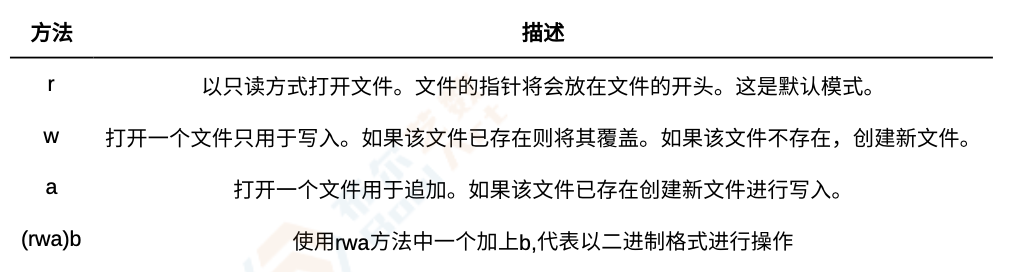

In [14]:
f = open('./test.txt','w+')
f.write('第一行写入\n')
f.write('第二行写入')
f.read()
f.close()#使用open打开后需要关闭文件,文件使用完毕后必须关闭，因为文件对象会占用操作系统的资源，并且操作系统同一时间能打开的文件数量也是有限的：


  关于r、w、w+ :https://blog.csdn.net/ztf312/article/details/47259805

encoding编码方式常见的使用'utf-8'和'gbk',https://zhuanlan.zhihu.com/p/40834093

由于文件读写时都有可能产生IOError，一旦出错，后面的f.close()就不会调用。所以，为了保证无论是否出错都能正确地关闭文件，我们可以使用try ... finally来实现：

In [15]:
try:
    f = open('/path/to/file', 'r')
    print(f.read())
finally:
    if f:
        f.close()

FileNotFoundError: [Errno 2] No such file or directory: '/path/to/file'

但是每次都这么写实在太繁琐，所以，Python引入了with语句来自动帮我们调用close()方法：

总结：以后读写文件都使用with open语句，不要再像以前那样用f = open()这种语句了

In [17]:
with open('./test.txt', mode='a',encoding='utf-8') as f:
    f.write("a ")

这和前面的try ... finally是一样的，但是代码更佳简洁，并且不必调用f.close()方法。

调用read()会一次性读取文件的全部内容，如果文件有10G，内存就爆了，所以，要保险起见，可以反复调用read(size)方法，每次最多读取size个字节的内容。另外，调用readline()可以每次读取一行内容，调用readlines()一次读取所有内容并按行返回list。因此，要根据需要决定怎么调用。

如果文件很小，read()一次性读取最方便；如果不能确定文件大小，反复调用read(size)比较保险；如果是配置文件，调用readlines()最方便：



f.read()：读取全部文件内容 

f.readline()：每次读取一行的内容 

f.readlines（）：读取全的内容，但结果是个list，每行内容是一个元素

In [18]:
#对文件进行读取操作
with open('./test.txt','r',encoding='utf-8') as f:
    print(f.read())
    print('*'*20)
    
with open('./test.txt','r',encoding='utf-8') as f:
    print(f.readline())
    
    
with open('./test.txt','r',encoding='utf-8') as f:
    print(f.readlines())

第一行写入
第二行写入a 
********************
第一行写入

['第一行写入\n', '第二行写入a ']


# 4.lambda匿名函数 

使用lambda写Python脚本时可以省去定义函数的过程，让代码更加简洁

In [20]:
def test(a,b,func):
    result = func(a,b)
    return result

num = test(11,22,lambda x,y:x+y)
print(num)

num = test(11,22,lambda x,y:x*y)
print(num)

33
242


In [21]:
##为啥要带括号呢？相当于f(x)
[(lambda x:x*x) (x) for x in range(10)]

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]

In [28]:
#将字典按某一个键排序
infors = [{"id":1,"info":10},{"id":2,"info":20},{"id":3,"info":10}]
infors.sort(key= lambda x: x['info'])
print(infors)

a = [(1, 2), (4, 1), (9, 10), (13, -3)]
a.sort(key=lambda x : x[1], reverse=True)#倒叙排序
print(a)


[{'id': 1, 'info': 10}, {'id': 3, 'info': 10}, {'id': 2, 'info': 20}]
[(9, 10), (1, 2), (4, 1), (13, -3)]


# 5.python内置函数 

Python解释器自带的函数称为内置函数，这些函数可以直接使用，不需要导入某个模块，可以使用builtins查看提供的内置函数，可以看到int,print,str，tuple等第一部分的数据结构的常见函数均在内置函数中。

In [30]:
import builtins

dir(builtins)

['ArithmeticError',
 'AssertionError',
 'AttributeError',
 'BaseException',
 'BlockingIOError',
 'BrokenPipeError',
 'BufferError',
 'BytesWarning',
 'ChildProcessError',
 'ConnectionAbortedError',
 'ConnectionError',
 'ConnectionRefusedError',
 'ConnectionResetError',
 'DeprecationWarning',
 'EOFError',
 'Ellipsis',
 'EnvironmentError',
 'Exception',
 'False',
 'FileExistsError',
 'FileNotFoundError',
 'FloatingPointError',
 'FutureWarning',
 'GeneratorExit',
 'IOError',
 'ImportError',
 'ImportWarning',
 'IndentationError',
 'IndexError',
 'InterruptedError',
 'IsADirectoryError',
 'KeyError',
 'KeyboardInterrupt',
 'LookupError',
 'MemoryError',
 'ModuleNotFoundError',
 'NameError',
 'None',
 'NotADirectoryError',
 'NotImplemented',
 'NotImplementedError',
 'OSError',
 'OverflowError',
 'PendingDeprecationWarning',
 'PermissionError',
 'ProcessLookupError',
 'RecursionError',
 'ReferenceError',
 'ResourceWarning',
 'RuntimeError',
 'RuntimeWarning',
 'StopAsyncIteration',
 'StopIter

## 5.1 map 

map主要联合其他函数使用，将函数依次作用到序列的每个元素，得到一个新的序列。

In [32]:
li_1 = [1,2,3,4,5,6]
li_2 = ['a','b','c','d','e','f']

print(list(map(lambda x: x*x,li_1)))
print(list(map(lambda x: x+x , li_1)))
print(list(map(lambda x,y:{x,y}, li_1,li_2)))

[1, 4, 9, 16, 25, 36]
[2, 4, 6, 8, 10, 12]
[{1, 'a'}, {2, 'b'}, {'c', 3}, {'d', 4}, {5, 'e'}, {'f', 6}]


## 5.2 filter 

filter是将传入的函数依次作用于每个元素，然后根据返回值是True还是False决定保留还是丢弃该元素，主要对序列的值进行过滤


In [3]:
list3 = [1,2,3,4,5,6,7,8,9] # 对数过滤大小
print(list(filter(lambda x: x>5,list3)))
li = list(range(1,200))#以一定规则进行过滤（镜像数字）
print(list(filter(lambda x : str(x) == str(x)[::-1],li )))

[6, 7, 8, 9]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 22, 33, 44, 55, 66, 77, 88, 99, 101, 111, 121, 131, 141, 151, 161, 171, 181, 191]


## 5.3 sorted 

sorted(iterable,key=None, reverse=False)接受一个key函数来实现对可迭代对象进行自定的排序

In [20]:
li = [-21,-12,5,9,36]
print(sorted(li,key=lambda x:abs(x),reverse =True ))
L = [('SGD', 75), ('Adam', 92), ('AdamW', 66), ('Nadam', 88)]
print(type(L))
print(sorted(L,key = lambda x : x[1],reverse = True))

[36, -21, -12, 9, 5]
<class 'list'>
[('Adam', 92), ('Nadam', 88), ('SGD', 75), ('AdamW', 66)]


## 5.4 reduce函数 

指定列表中两两相邻元素的结合条件

In [22]:
from functools import reduce

sum1 = reduce(lambda x,y:x+y, [1, 2, 3, 4])#实现原理(((1+2)+3)+4) 
sum1


10

## 5.5 迭代器和生成器 

迭代器是Python最强大的功能之一，是访问集合元素的一种方式。迭代器从访问集合的第一个元素开始，直到所有元素被访问完结束。迭代器只能前进不能后退，迭代器有两个基本方法iter()和next()。

In [9]:
li= [-21, -12, 5, 9, 36]
it = iter(li)#创建一个迭代器对象

print(next(it))#运行一次会输出下一个迭代对象，当执行到最后一个迭代元素后仍执行迭代语句时会报错：StopIteration:
print(next(it))

-21
-12


In [10]:
for x in it: #用for循环遍历迭代器对象，注意：迭代器和执行次数相关，这里没有-21，是因为上面已经执行过一次next(it)
    print(x)

5
9
36


在Python中，使用了yield的函数被称为生成器，和其他函数不同的是，每当程序执行完语句时，程序就会暂停执行。不仅如此，即便调用生成器函数，Python解释器也不会执行函数中的代码，它只会返回一个生成器(对象)

In [25]:
def intNum():
    print('开始执行')
    for i in range(5):
        yield i
        print('继续执行')
        
num = intNum()

In [26]:
#调用 next() 函数
print(next(num))

开始执行
0


In [27]:
#通过for循环遍历生成器：
for i in num:
    print(i)

继续执行
1
继续执行
2
继续执行
3
继续执行
4
继续执行


In [18]:
num = intNum()
#生成器还可以使用list(),和tuple(),直接将生成器生成的所有值存储在list或tuple的格式中
print(list(num))

开始执行
继续执行
继续执行
继续执行
继续执行
继续执行
[0, 1, 2, 3, 4]


# 6. 使用函数的简单实例 

## 6.1 查询星座 

先将星座和星座的日期范围放入两个列表中，通过计算输入生日，判断生日的对应星座

In [82]:
#1-20到2-19之间为水瓶座剩下的同理
def xingzuo(month,day):
    m =['水瓶座','双鱼座','白羊座','金牛座','双子座','巨蟹座','狮子座','处女座','天秤座',\
        '天蝎座','射手座','摩羯座']
    d =('1-20','2-19','3-21','4-20','5-21','6-22','7-23','8-23','9-23','10-24','11-23','12-22')
    month=month-1
    if day>int(d[month].split('-')[1]):
        return m[month]
    else:
        return m[month-1]

def funhelp():
    print('星座查询')
    print('年、月、日使用公历')
    print('输入格式：1982-02-24')
    return(input('输入出生日期：'))

a = funhelp().split('-')
year = int(a[0])
month = int(a[1])
day = int(a[2])

print('您的星座是:%s'%xingzuo(month,day))

星座查询
年、月、日使用公历
输入格式：1982-02-24
输入出生日期：1995-01-12
您的星座是:摩羯座


# 7 小练习 

1. 将列表[-21, -12, 5, 9, 36]按照绝对值大小排列后，将排序后列表中每个值取平方，结果[25, 81, 144, 441, 1296]

In [113]:
li_1=[-21, -12, 5, 9, 36]
li_sort=sorted(li_1,key=lambda x :abs(x))
li_sort_square=list(map(lambda x :x*x,li_sort))
print(li_sort_square)

[25, 81, 144, 441, 1296]


2. 生活中有一些小游戏我们也是可以用Python实现的，如猜数字，使用random随机生产一个数字，给用户五次机会猜数字是多少，通过input函数输出猜测的数字，当猜测错误时可以给出相应的提示，猜测正确则输出提示信息，猜测超过五次输出结果和提示信息；提示：value =random.randint(1,100)通过random产生一个整数。

In [147]:
import random
value = random.randint(1,100)
times = 1
def caishuzi(a):
    global times
    #前四次判断
    while times <5:
        if a > value:
            print('猜大了')
            times +=1
            success = 0
        elif a == value:
            return print('猜对了，答案是%s'%value)
            success = 1
        else:
            print('猜小了')
            times +=1
            success = 0
        a = int(input('请进行第%s次输入:'%times))
    #最后一次判断
    if success ==1:
        return '你真棒'
    else:
        if a == value:
            return '猜对了，答案是%s'%value
        
        else:
            return '猜错了，猜测超过5次，正确数字是:%s'%value
    
    
    
a = int(input('请输入一个你认为可能在1,100之间的整数:'))
print(caishuzi(a))


请输入一个你认为可能在1,100之间的整数:66
猜小了
请进行第2次输入:88
猜大了
请进行第3次输入:77
猜小了
请进行第4次输入:79
猜小了
请进行第5次输入:80
猜错了，猜测超过5次，正确数字是:87


3.已知数组nums = [-1,0,1,2,5,-4] ,输出数组中和为0 且不重复的三个元素[[-4, -1, 5], [-1, 0, 1]]
提示：数组排序后通过for循环，判断是否存在剩下数中两数的和等于循环数对应的负数。

In [160]:
#组合遍历：每遍历一个，会被后面的遍历排除，每个元素只会被遍历一次
nums = [-1,0,1,2,5,-4]
nums = list(sorted(nums))
sum3_0=[]
for x in range(len(nums)):
    i_1=nums[x]
    for y in range(x+1,len(nums)):
        i_2=nums[y]
        for z in range(y+1,len(nums)):
            i_3=nums[z]
            if -i_1 == i_2+i_3:
                sum3_0.append([i_1,i_2,i_3])
            else:
                pass
                    
print(sum3_0)


[[-4, -1, 5], [-1, 0, 1]]


In [161]:
##排列遍历：每个元素都会被遍历n（组合元素数）次
nums = [-1,0,1,2,5,-4]
nums = list(sorted(nums))
sum3_0=[]
for i in nums:
    box = set(nums)
    target_1=set([i])
#     print('target1',target_1)
    box.difference_update(target_1)
#     print('box1',box)
    sec_box=list(box)
    for x in sec_box:
        box = set(sec_box)
        target_2=set([x])
        box.difference_update(target_2)
#         print('box2',box)
        third_box=list(box)
        for y in third_box:
            box = set(sec_box)
            target_3=set([y])
            
            box.difference_update(target_3)
#             print('box3',box)
            if i == -(x+y):
                sum3_0.append([i,x,y])
            else:
                pass
print(sum3_0)

[[-4, 5, -1], [-4, -1, 5], [-1, 0, 1], [-1, 1, 0], [-1, 5, -4], [-1, -4, 5], [0, 1, -1], [0, -1, 1], [1, 0, -1], [1, -1, 0], [5, -4, -1], [5, -1, -4]]
